#  Project Setup + Data Understanding

In [ ]:
#download data from kaggle
!pip install opendatasets

In [ ]:
import pandas as pd
import numpy as np
import opendatasets as od
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [ ]:
od.download("https://www.kaggle.com/competitions/titanic/data?select=train.csv")
#hemantk777  721b095dacb7cfa6129768282921b8fb

Skipping, found downloaded files in "./titanic" (use force=True to force download)


In [ ]:
titanic_df=pd.read_csv("/content/titanic/train.csv")

In [ ]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
titanic_df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
titanic_df['Survived'].value_counts()

,count
Survived,
0,549
1,342


In [ ]:
# Unique values in key categorical columns
print("Sex:", titanic_df['Sex'].unique())
print("Pclass:", titanic_df['Pclass'].unique())
print("Embarked:", titanic_df['Embarked'].unique())

Sex: ['male' 'female']
Pclass: [3 1 2]
Embarked: ['S' 'C' 'Q' nan]


#  Data Cleaning & Formatting

In [ ]:
# Drop Cabin column
titanic_df.drop('Cabin', axis=1, inplace=True)

In [ ]:
## Fill Age with median
titanic_df['Age'].fillna(titanic_df['Age'].median(),inplace=True)

/tmp/ipython-input-68-35110064.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['Age'].fillna(titanic_df['Age'].median(),inplace=True)


In [ ]:
titanic_df['Embarked'].mode()[0]

'S'

In [ ]:
# Fill Embarked with mode
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace=True)

/tmp/ipython-input-70-1502174685.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace=True)


In [ ]:
titanic_df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
# Convert Survived, Pclass, Sex, Embarked to category
cat_cols = ['Survived', 'Pclass', 'Sex', 'Embarked']
for col in cat_cols:
    titanic_df[col] = titanic_df[col].astype('category')

In [ ]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Embarked     891 non-null    category
dtypes: category(4), float64(2), int64(3), object(2)
memory usage: 52.8+ KB


#  Univariate & Bivariate Visual EDA

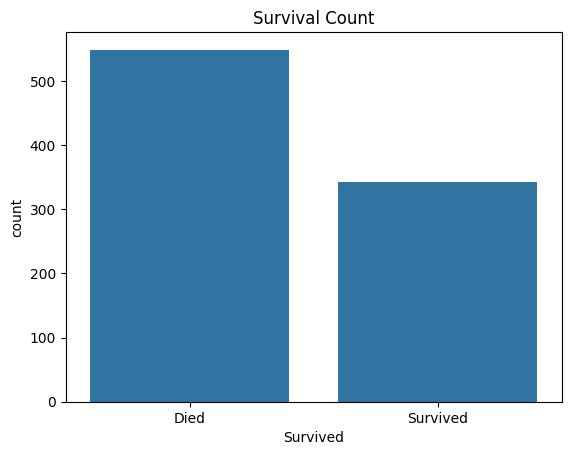

In [ ]:
sns.countplot(x='Survived', data=titanic_df)
plt.title("Survival Count")
plt.xticks([0,1], ['Died', 'Survived'])
plt.show()

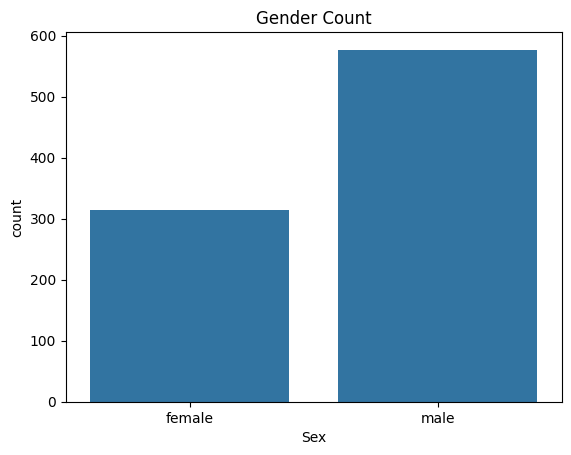

In [ ]:
sns.countplot(x='Sex', data=titanic_df)
plt.title("Gender Count")
plt.show()

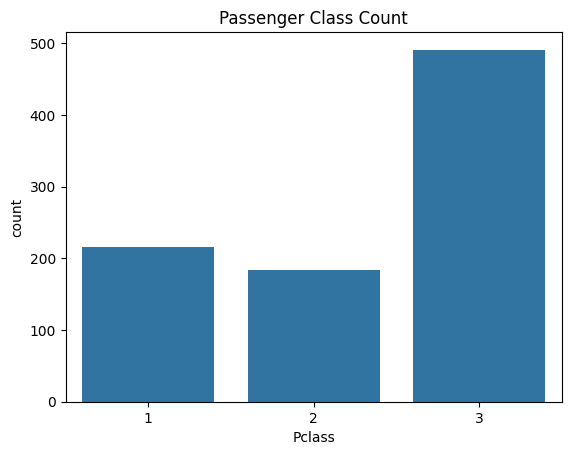

In [ ]:
sns.countplot(x='Pclass', data=titanic_df)
plt.title("Passenger Class Count")
plt.show()

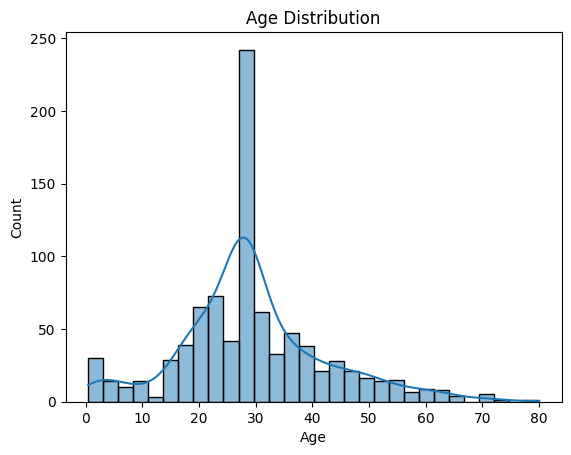

In [ ]:
sns.histplot(titanic_df['Age'], kde=True, bins=30)
plt.title("Age Distribution")
plt.show()


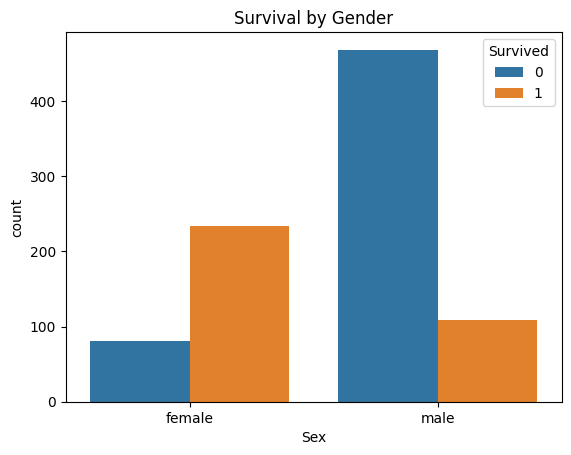

In [ ]:
sns.countplot(x='Sex', hue='Survived', data=titanic_df)
plt.title("Survival by Gender")
plt.show()

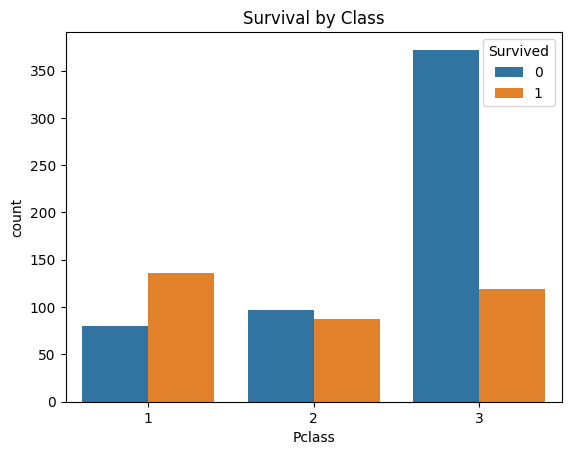

In [ ]:
sns.countplot(x='Pclass', hue='Survived', data=titanic_df)
plt.title("Survival by Class")
plt.show()

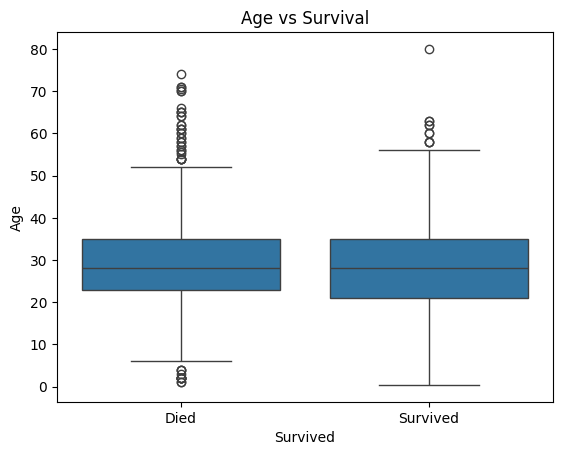

In [ ]:
sns.boxplot(x='Survived', y='Age', data=titanic_df)
plt.title("Age vs Survival")
plt.xticks([0,1], ['Died', 'Survived'])
plt.show()

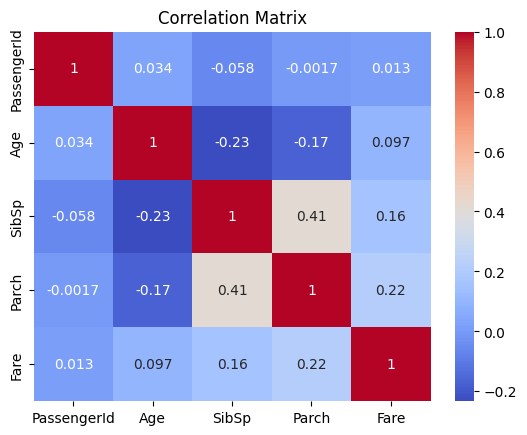

In [ ]:
sns.heatmap(titanic_df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Feature Engineering on Titanic

In [ ]:
# creat family size
titanic_df['FamilySize'] = titanic_df['SibSp'] + titanic_df['Parch'] + 1

In [ ]:
#Binning Age into Categories , Divides a numeric column (Age) into interval bins.
titanic_df['AgeGroup'] = pd.cut(titanic_df['Age'], bins=[0, 12, 18, 35, 60, 100],
                        labels=['Child', 'Teen', 'YoungAdult', 'Adult', 'Senior'])


In [ ]:
# Extract Title from Name
titanic_df['Title'] = titanic_df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
titanic_df['Title'].value_counts()


,count
Title,
Mr,517
Miss,182
Mrs,125
Master,40
Dr,7
Rev,6
Col,2
Mlle,2
Major,2


In [ ]:
titanic_df['Title'] = titanic_df['Title'].replace(['Lady','Countess','Capt','Col','Don','Dr',
 'Major','Rev','Sir','Jonkheer','Dona'], 'Other')
titanic_df['Title'] = titanic_df['Title'].replace(['Mlle', 'Ms'], 'Miss')
titanic_df['Title'] = titanic_df['Title'].replace('Mme', 'Mrs')

In [ ]:
#Encode Categorical Features
titanic_df = pd.get_dummies(titanic_df, columns=['Sex', 'Embarked','Title', 'AgeGroup'], drop_first=True)

In [ ]:
#Drop Unnecessary Columns
titanic_df.drop(['Ticket', 'Name', 'PassengerId'], axis=1, inplace=True)


In [ ]:
titanic_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Title_the Countess,AgeGroup_Teen,AgeGroup_YoungAdult,AgeGroup_Adult,AgeGroup_Senior
0,0,3,22.0,1,0,7.2500,2,True,False,True,False,True,False,False,False,False,True,False,False
1,1,1,38.0,1,0,71.2833,2,False,False,False,False,False,True,False,False,False,False,True,False
2,1,3,26.0,0,0,7.9250,1,False,False,True,True,False,False,False,False,False,True,False,False
3,1,1,35.0,1,0,53.1000,2,False,False,True,False,False,True,False,False,False,True,False,False
4,0,3,35.0,0,0,8.0500,1,True,False,True,False,True,False,False,False,False,True,False,False


In [ ]:
titanic_df.shape

(891, 19)

# Machine Learning : Logistic Regression Modeling

In [ ]:
X = titanic_df.drop('Survived', axis=1)
y = titanic_df['Survived']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=200)

In [ ]:
y_pred = model.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7988826815642458
Confusion Matrix:
 [[89 16]
 [20 54]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [ ]:
import joblib
joblib.dump(model, "LogisticRegression_model.pkl")

['LogisticRegression_model.pkl']

# Model Optimization + Final Titanic Project Polish


In [ ]:
#Use Pipeline + Scaling + CV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Create pipeline with scaling
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LogisticRegression(max_iter=200))
])

# Cross-validation
scores = cross_val_score(pipeline, X, y, cv=5)
print("Cross-Validated Accuracy:", scores.mean())


Cross-Validated Accuracy: 0.8226602222082733


In [ ]:
#Fit Final Model & Evaluate
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8100558659217877
Confusion Matrix:
 [[88 17]
 [17 57]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.84      0.84       105
           1       0.77      0.77      0.77        74

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



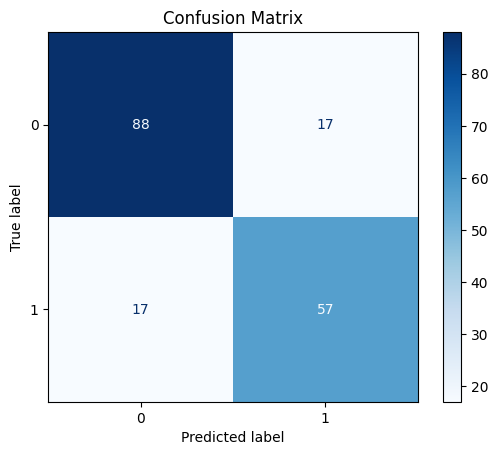

In [ ]:
# Plot Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(pipeline, X_test, y_test, cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

## Author
Hemant Karpe
📧 hemant777.karpe@gmail.com
🔗 [LinkedIn](https://www.linkedin.com/in/hemant-karpe)